In [1]:
# This notebook is to demonstrate how to run the Classification Model
import os#
import pandas as pd# to read the data frame
import numpy as np#np is to perform the mathmetical function
import matplotlib.pyplot as plt# plt is to perform visualization in python
import warnings
warnings.filterwarnings("ignore")

In [46]:
test_df=pd.read_csv('C:\\Users\\avinash\\Downloads\\test.csv')# Command to read the dataset
test_df.head()
test_df['Class'].value_counts()#we consider the class is the traget /output variable.

C    1694
B    1163
A    1052
E    1029
F     699
D     202
Name: Class, dtype: int64

In [29]:
#asigned few values from test_df and created a dataframe using dictinoary
df=pd.DataFrame({'A':test_df['A'],'B':test_df['B'],'C':test_df['C'],'G':test_df['G'],'R':test_df['R'],'X6':test_df['X6'],'X8':test_df['X8'],'Class':test_df['Class']})
df.head()

,A,B,C,G,R,X6,X8,Class
0,6,860.62,809.73,65.24,573,88.1326,0.2113,A
1,7,871.58,789.74,64.54,849,84.8057,0.2151,A
2,6,854.87,789.74,64.54,687,90.5386,0.2127,A
3,7,823.73,759.75,68.20,475,86.1053,0.2081,A
4,6,823.44,759.75,68.20,424,87.0283,0.2429,A


In [30]:
y=df['Class']#assign class variable to y
df.drop(columns='Class',inplace=True)#to drop the class variable

In [32]:
df.isnull().sum()

A     0
B     0
C     0
G     0
R     0
X6    0
X8    0
dtype: int64

In [31]:
# This command splits the data set into training & testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=42)

In [33]:
cont_cols=[col for col in X_train.columns if df[col].dtype=="int64" or "float64"]#created a list for cols contain continous variable
cont_cols

['A', 'B', 'C', 'G', 'R', 'X6', 'X8']

In [37]:
from sklearn.preprocessing import StandardScaler#standard scaler is used to scale the continous variables
scaler=StandardScaler()
for ele in cont_cols:
    X_train[ele]=scaler.fit_transform(np.array(X_train[ele]).reshape(-1,1))#fitting the X_train[ele] to scale
    X_test[ele]=scaler.transform(np.array(X_test[ele]).reshape(-1,1))#here we are transforming the Xtest

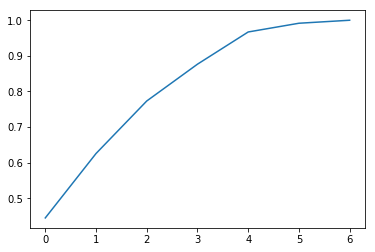

In [38]:
from sklearn.decomposition import PCA#pca is used to reduce features by checking its correlation
pca=PCA()

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  

plt.plot(np.cumsum(pca.explained_variance_ratio_))#here the plot is to check the features highly covariance
v=pca.components_

In [51]:
pca=PCA()#here we had not consider any components due to the featues are less
X_train

array([[-2.54682314, -0.12449152,  0.16950239, ...,  0.24327487,
         0.3138415 ,  0.08858577],
       [-1.51860025,  0.13509896,  0.8692837 , ...,  0.02432457,
        -0.04889962,  0.07819777],
       [ 0.04191776,  0.56696961, -0.24521453, ..., -0.33953247,
        -0.19410016, -0.53031301],
       ...,
       [-1.27275497, -0.59550527,  0.23600812, ..., -0.44932697,
         0.0541705 , -0.12473608],
       [ 5.09116077, -1.33913533, -1.06920524, ..., -1.01540869,
         1.65461796,  0.60998146],
       [ 0.87107831, -0.33787404, -0.88710073, ..., -0.43544212,
        -0.19357273,  0.03060128]])

In [96]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.44607992 0.18068925 0.14587559 0.10323001 0.09120868 0.024454
 0.00846255]
[[ 0.35043476 -0.53564958 -0.48602908  0.47552838 -0.05283886 -0.31692283
  -0.15713521]
 [ 0.07967023 -0.03422114 -0.3160351  -0.36040667  0.85307051  0.03836165
  -0.18305603]
 [ 0.30853439 -0.11092898 -0.11352069  0.09787647  0.12374932  0.42082113
   0.82318298]
 [ 0.44217935 -0.01516299  0.07212045  0.02724144 -0.14503821  0.72075356
  -0.50772264]
 [ 0.76118726  0.28735905  0.28750759 -0.22693199 -0.01764939 -0.44817725
   0.05182313]
 [-0.02002047  0.07335398  0.54290772  0.68109865  0.48197024 -0.00908074
  -0.05653701]
 [ 0.01803397  0.78193175 -0.51807319  0.3438959  -0.02284677  0.02380915
  -0.02245998]]


In [52]:
from sklearn.tree import DecisionTreeClassifier

#Import GridSearchCV,RandomizedSearchCV for Hyperparameter Tunning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [64]:
#Import the metrics to measure the performance of the model, here the problem statement is classification, so we import the classification problem metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve


In [55]:
tree=DecisionTreeClassifier()# instantiating the model, tree is the object
parmeter={"criterion":["entropy"],#consider few parameter in decision tree classifier
          "max_depth":[5,6,7,8,9],
          "min_samples_split":[3,4,5,6,7],
          "min_samples_leaf":[1,2,3,4,5]}
#decision trees is to get clarity of information representation

In [56]:
rd_cv=RandomizedSearchCV(estimator=tree,param_distributions=parmeter,cv=5,n_iter=10)

rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)#finding best parameters

print(rd_cv.best_score_)

{'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'entropy'}
0.45852703694641544


In [57]:
gd_cv=GridSearchCV(estimator=tree,param_grid=parmeter,cv=15)

gd_cv.fit(X_train,y_train)

print(gd_cv.best_params_)

print(gd_cv.best_score_)

print(gd_cv.best_estimator_)

print(gd_cv.best_index_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 7}
0.4771225838023
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
114


In [67]:
#here we are considering  grid_cv parameters only based upon that we had built decision tree
tree=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,min_samples_split=3,random_state=40)
# Training the model on the train data
tree.fit(X_train,y_train)
# Predict on the test data
y_pred=tree.predict(X_test)
#Generate the confusion Matrix 
confusion_matrix(y_test,y_pred)

array([[100,  67,  80,   0,  22,  49],
       [ 67, 137, 109,   2,  24,  21],
       [ 39,  59, 329,   1,  15,  43],
       [  9,   8,  13,  12,  22,   8],
       [ 34,  40,  72,  13, 130,  26],
       [ 44,  21,  47,   2,  12,  75]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred)

0.4469178082191781

In [72]:
precision_score(y_test, y_pred, average=None)

array([0.34129693, 0.4126506 , 0.50615385, 0.4       , 0.57777778,
       0.33783784])

In [74]:
recall_score(y_test,y_pred,average=None)

array([0.31446541, 0.38055556, 0.67695473, 0.16666667, 0.41269841,
       0.37313433])

In [76]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred,average=None)

array([0.32733224, 0.39595376, 0.57922535, 0.23529412, 0.48148148,
       0.35460993])

In [88]:
from sklearn.preprocessing import LabelBinarizer#to convert multiclass format 
lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)

In [ ]:
y_pred_proba=tree.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR
auc=roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()